In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data = pd.read_csv('E:\\itsstudytym\\Python Project\\ML Notebook Sessions\\Breast Cancer Disease Prediction\\data.csv')
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


#### Check Null Values

In [5]:
data.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

#### Check Balanced or Imbalanced Dataset

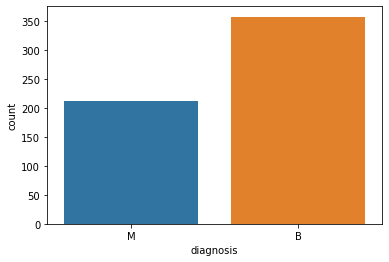

In [6]:
sns.countplot(x='diagnosis',data=data)

In [7]:
data.shape

(569, 33)

In [8]:
M = len(data[data['diagnosis']=='M'])/len(data)
M

0.37258347978910367

#### Check Correlation

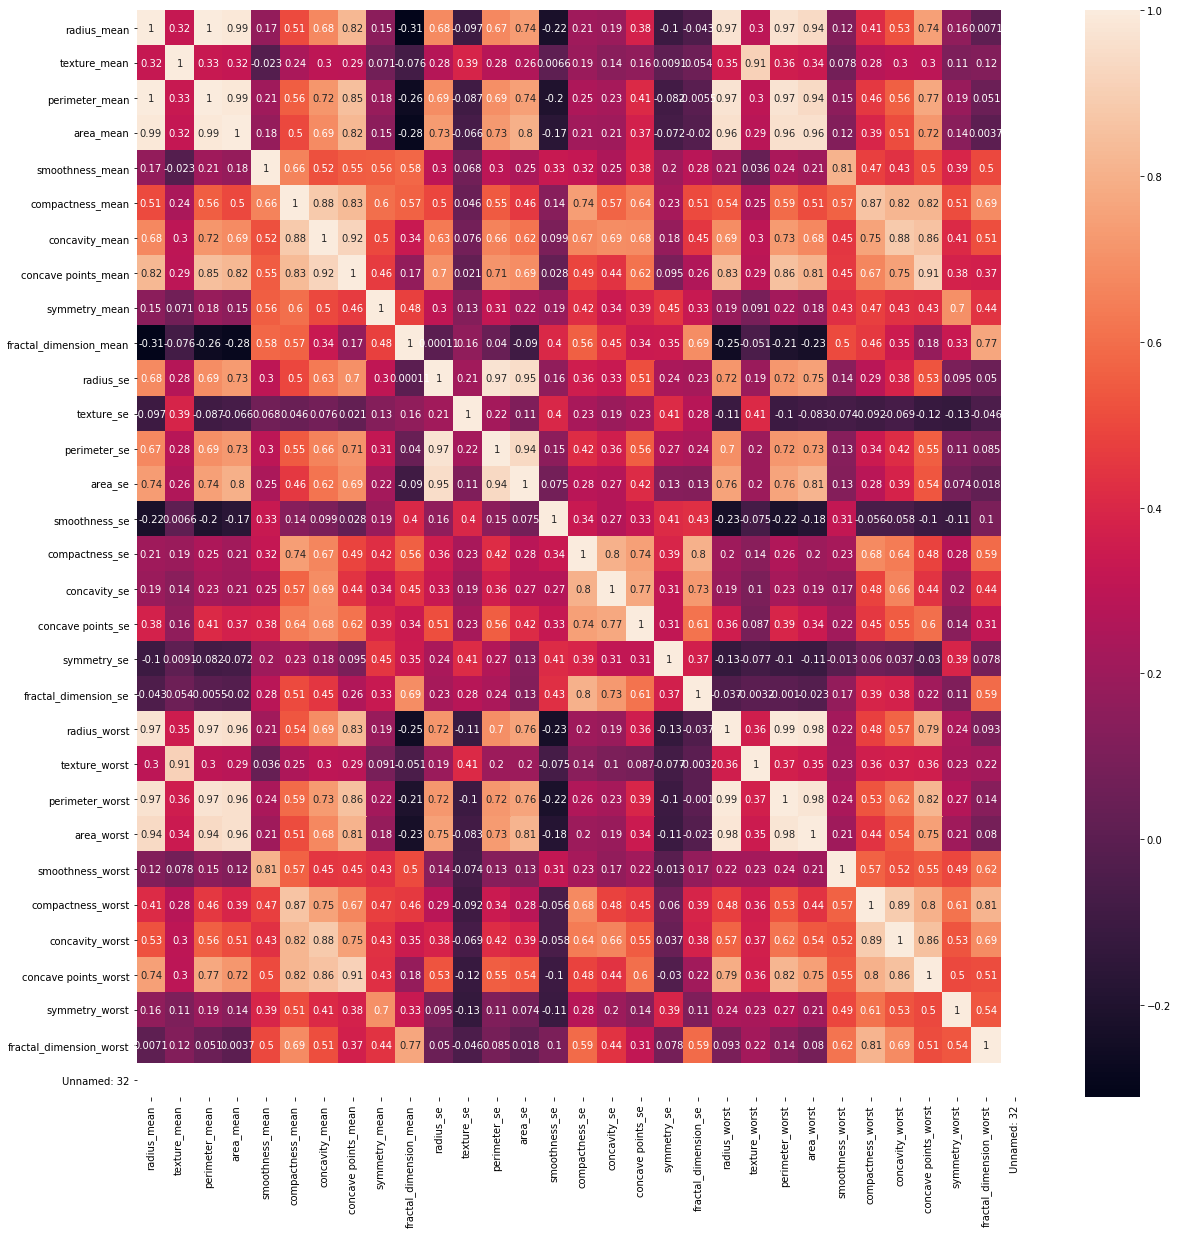

In [9]:
data = data.drop('id',axis=1)
plt.figure(figsize=(20,20))
sns.heatmap(data.corr(),annot=True)

In [10]:
data = data.drop(['perimeter_mean','radius_mean','radius_worst','perimeter_worst','concave points_mean','radius_se','perimeter_se','texture_se','compactness_worst','concave points_worst','compactness_mean','texture_se'],axis=1)
data.head()data = data.drop(['texture_worst','area_worst','concavity_worst'],axis=1)

SyntaxError: invalid syntax (<ipython-input-10-157a40d3ea69>, line 2)

In [11]:
data = data.drop(['texture_worst','area_worst','concavity_worst'],axis=1)

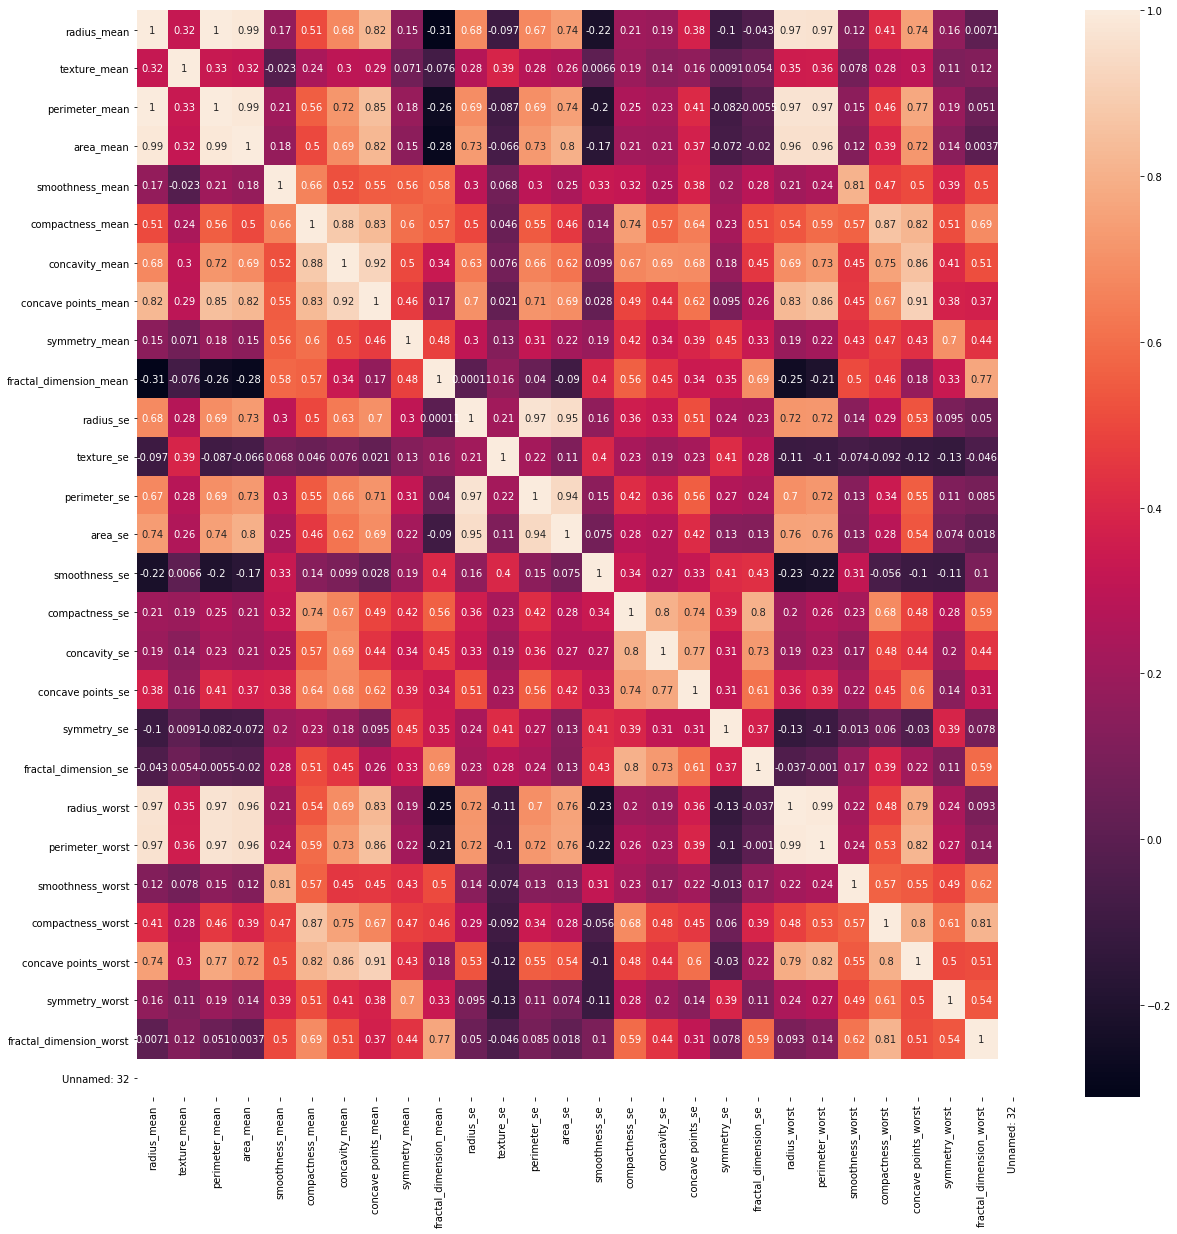

In [12]:
plt.figure(figsize=(20,20))
sns.heatmap(data.corr(),annot=True)

In [13]:
data = data.drop(['Unnamed: 32'],axis=1)
data.head(10)


,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,perimeter_worst,smoothness_worst,compactness_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,0.01587,0.03003,0.006193,25.38,184.60,0.1622,0.6656,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,0.01340,0.01389,0.003532,24.99,158.80,0.1238,0.1866,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,0.02058,0.02250,0.004571,23.57,152.50,0.1444,0.4245,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,0.01867,0.05963,0.009208,14.91,98.87,0.2098,0.8663,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,0.01885,0.01756,0.005115,22.54,152.20,0.1374,0.2050,0.1625,0.2364,0.07678
5,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,...,0.01137,0.02165,0.005082,15.47,103.40,0.1791,0.5249,0.1741,0.3985,0.12440
6,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,...,0.01039,0.01369,0.002179,22.88,153.20,0.1442,0.2576,0.1932,0.3063,0.08368
7,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,...,0.01448,0.01486,0.005412,17.06,110.60,0.1654,0.3682,0.1556,0.3196,0.11510
8,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,...,0.01226,0.02143,0.003749,15.49,106.20,0.1703,0.5401,0.2060,0.4378,0.10720
9,M,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,0.2030,...,0.01432,0.01789,0.010080,15.09,97.65,0.1853,1.0580,0.2210,0.4366,0.20750


### Feature Scaling

In [14]:
from sklearn.preprocessing import StandardScaler
stsc = StandardScaler()

In [15]:
x = data.drop('diagnosis',axis=1)
y = data['diagnosis']

In [16]:
x = pd.DataFrame(stsc.fit_transform(x))

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=100)

### Decision Tree Classification Model

In [18]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(criterion='entropy')
dtree.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [19]:
y_predict = dtree.predict(x_test)
y_predict

array(['M', 'B', 'M', 'B', 'B', 'B', 'M', 'M', 'B', 'B', 'B', 'M', 'M',
       'M', 'B', 'M', 'M', 'B', 'B', 'B', 'M', 'B', 'M', 'M', 'M', 'M',
       'B', 'B', 'B', 'B', 'M', 'M', 'B', 'M', 'M', 'B', 'B', 'B', 'B',
       'M', 'M', 'B', 'B', 'M', 'B', 'M', 'B', 'B', 'B', 'B', 'M', 'B',
       'B', 'M', 'B', 'B', 'B', 'M', 'B', 'B', 'M', 'M', 'B', 'B', 'M',
       'B', 'M', 'M', 'B', 'M', 'M', 'B', 'M', 'M', 'B', 'B', 'B', 'M',
       'M', 'B', 'B', 'M', 'M', 'M', 'B', 'M', 'M', 'B', 'M', 'B', 'B',
       'B', 'B', 'M', 'B', 'M', 'M', 'B', 'M', 'B', 'M', 'M', 'B', 'B',
       'B', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'M', 'B'], dtype=object)

In [20]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
dtree_acc = accuracy_score(y_test,y_predict)
dtree_acc

0.9473684210526315

In [21]:
dtree_cm = confusion_matrix(y_test,y_predict)
dtree_cm

array([[61,  4],
       [ 2, 47]], dtype=int64)

In [22]:
dtree_cls = classification_report(y_test,y_predict)
print(dtree_cls)


              precision    recall  f1-score   support

           B       0.97      0.94      0.95        65
           M       0.92      0.96      0.94        49

    accuracy                           0.95       114
   macro avg       0.94      0.95      0.95       114
weighted avg       0.95      0.95      0.95       114



### Random Forest Classification Model

In [23]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=5)
rfc.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=5,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [24]:
y_pred = rfc.predict(x_test)
y_pred

array(['M', 'B', 'M', 'B', 'B', 'B', 'M', 'M', 'B', 'B', 'B', 'M', 'M',
       'M', 'B', 'B', 'M', 'B', 'B', 'B', 'M', 'B', 'M', 'M', 'M', 'M',
       'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'M', 'B', 'B', 'B', 'B',
       'M', 'M', 'B', 'B', 'M', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B',
       'B', 'M', 'B', 'B', 'B', 'M', 'B', 'B', 'M', 'M', 'B', 'B', 'M',
       'B', 'M', 'M', 'B', 'M', 'M', 'B', 'M', 'M', 'B', 'B', 'B', 'M',
       'M', 'B', 'B', 'M', 'M', 'M', 'B', 'M', 'M', 'B', 'M', 'B', 'M',
       'B', 'B', 'M', 'B', 'M', 'M', 'B', 'M', 'B', 'M', 'M', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'M', 'B'], dtype=object)

In [45]:
rfc_acc = accuracy_score(y_test,y_pred)
rfc_acc

0.9473684210526315

In [46]:
rfc_cm = confusion_matrix(y_test,y_pred)
rfc_cm

array([[63,  2],
       [ 4, 45]], dtype=int64)

In [47]:
rfc_clsr = classification_report(y_test,y_pred)
print(rfc_clsr)

              precision    recall  f1-score   support

           B       0.94      0.97      0.95        65
           M       0.96      0.92      0.94        49

    accuracy                           0.95       114
   macro avg       0.95      0.94      0.95       114
weighted avg       0.95      0.95      0.95       114



### K-Nearest Neighbor Classification Model

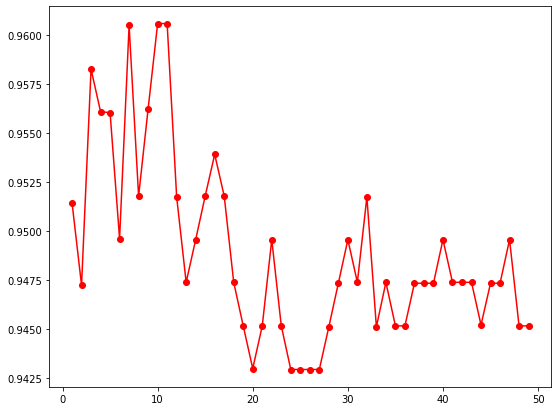

In [28]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
knn_nscore = []
for k in range(1,50):
    knn = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(knn,x_train,y_train,cv=10)
    knn_nscore.append(score.mean())
plt.figure(figsize=(9,7))
plt.plot([k for k in range(1,50)],knn_nscore,color='red',marker='o')

In [48]:
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')

In [39]:
knny_predict = knn.predict(x_test)
knny_predict

array(['M', 'B', 'M', 'B', 'B', 'B', 'M', 'M', 'B', 'B', 'B', 'M', 'M',
       'M', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'M', 'M', 'M', 'M',
       'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'M', 'B', 'B', 'B', 'B',
       'M', 'M', 'B', 'B', 'M', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B',
       'B', 'M', 'B', 'B', 'B', 'M', 'B', 'B', 'M', 'M', 'B', 'B', 'M',
       'B', 'M', 'M', 'B', 'M', 'M', 'B', 'M', 'M', 'B', 'B', 'B', 'M',
       'M', 'B', 'B', 'M', 'M', 'M', 'B', 'M', 'M', 'B', 'M', 'B', 'B',
       'B', 'B', 'M', 'B', 'M', 'M', 'B', 'M', 'B', 'M', 'M', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B'], dtype=object)

In [49]:
knn_acc = accuracy_score(y_test,knny_predict)
knn_acc

0.956140350877193

In [52]:
print(confusion_matrix(y_test,knny_predict))

[[65  0]
 [ 5 44]]


In [51]:
print(classification_report(y_test,knny_predict))

              precision    recall  f1-score   support

           B       0.93      1.00      0.96        65
           M       1.00      0.90      0.95        49

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114

